In [1]:
import numpy as np
import scipy.misc
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### ガウシアンフィルタ によるぼかし

In [2]:
face = scipy.misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)
local_mean = ndimage.uniform_filter(face, size=11) # 一様フィルタ

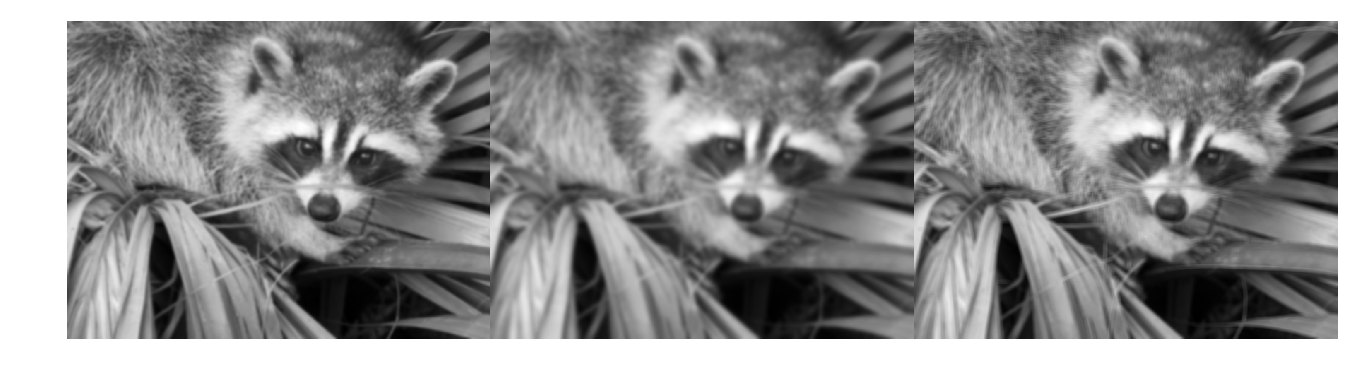

In [3]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(local_mean, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

In [4]:
blurred_face = ndimage.gaussian_filter(face, sigma=1, order=1)

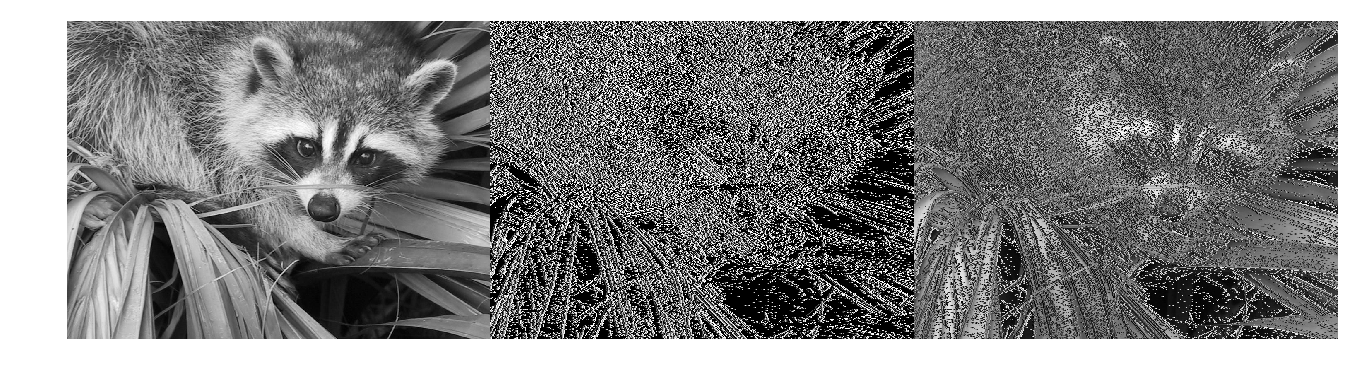

In [5]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(cv2.absdiff(face, blurred_face), cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=0, hspace=0., top=0.99, bottom=0.01,
                    left=0.01, right=0.99)

plt.show()

In [6]:
# a = np.asarray(np.arange(100, step=1).reshape((10,10)),dtype=np.double)
# a

In [7]:
# ndimage.gaussian_filter(a, sigma=1)

In [8]:
# ndimage.gaussian_filter(a, sigma=1, order=2)

### ガウシアンフィルタによる先鋭化

In [9]:
f = scipy.misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(f, 3)

filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)

In [10]:
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f) # 差分をとっているが、絶対値を取らないとラプラシアンフィルタになる

In [11]:
np.max(sharpened)

289.80956251008234

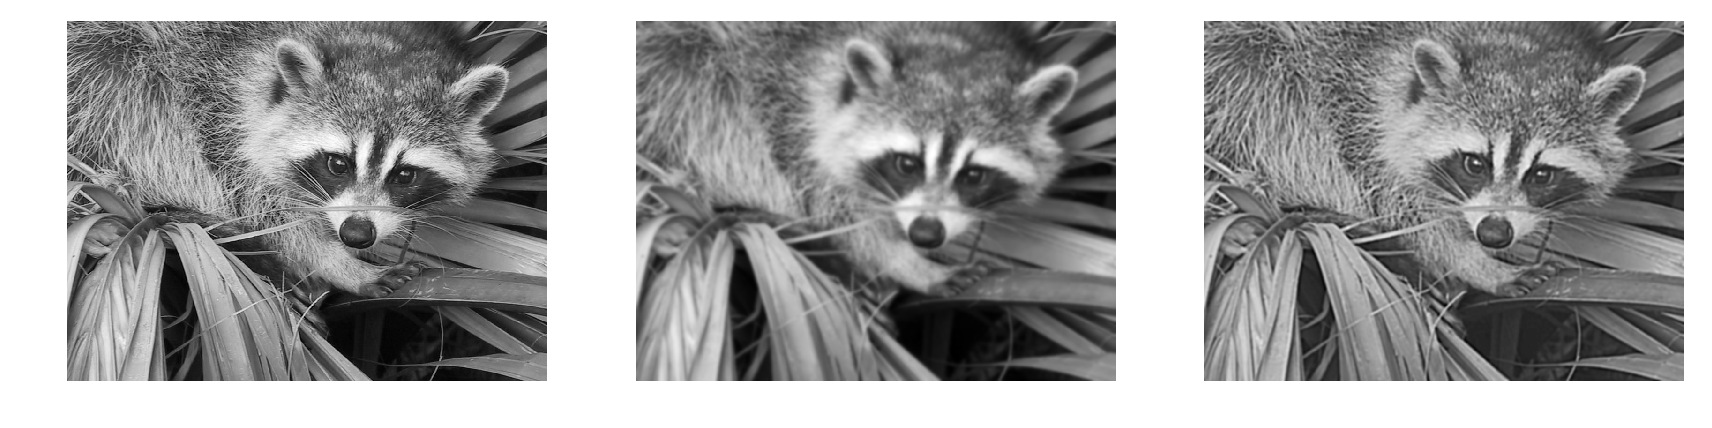

In [12]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

### 分散の異なるガウシアンフィルタ産物の差分の絶対値はエッジ抽出になる

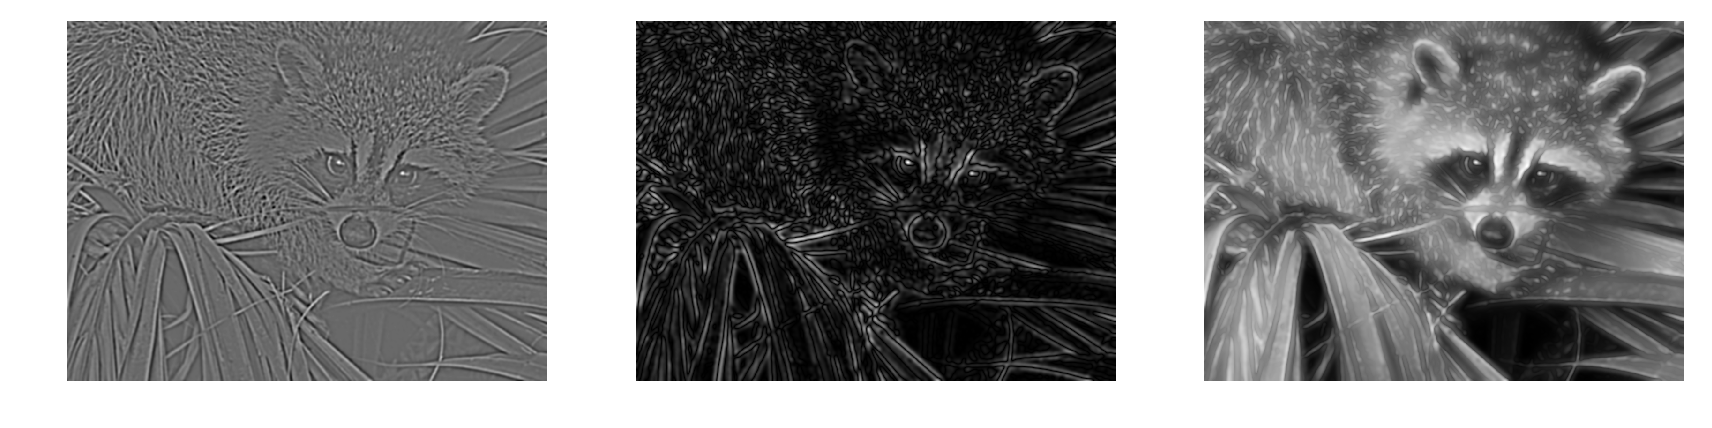

In [20]:
edge_f = cv2.absdiff(ndimage.gaussian_filter(blurred_f, 3),ndimage.gaussian_filter(f, 5))

plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(blurred_f - filter_blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(edge_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(blurred_f + 10*edge_f, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

### 非局在フィルタ : 

In [16]:
from skimage import data
from skimage import exposure
from skimage import io

camera = data.camera()
camera_equalized = exposure.equalize_hist(camera)

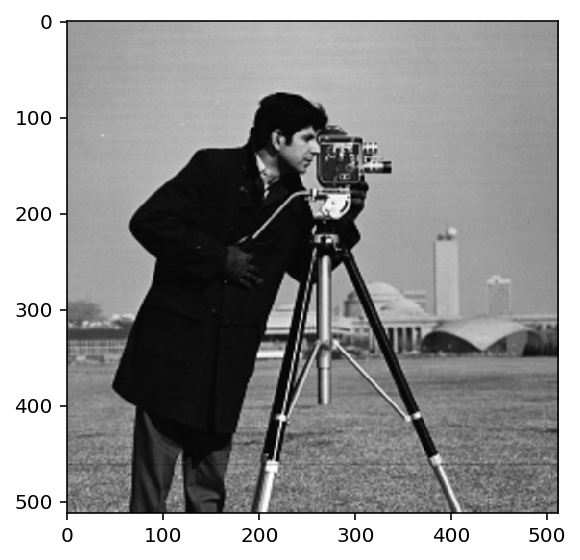

In [18]:
io.imshow(camera)

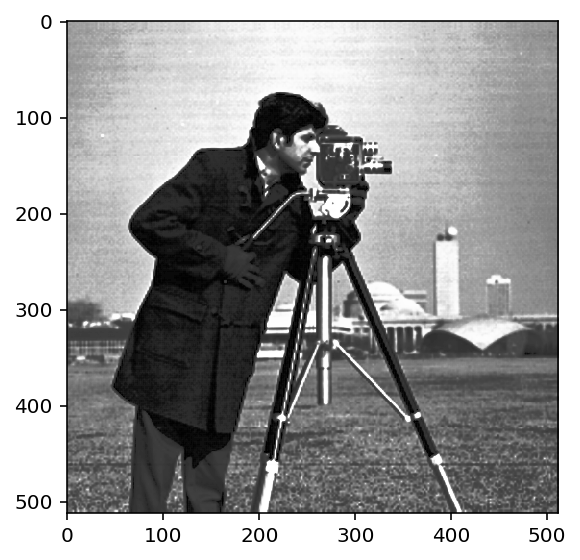

In [17]:
io.imshow(camera_equalized)
plt.show()